<a href="https://colab.research.google.com/github/kishan038/Global-Terrorism-Analysis/blob/main/Kishan_Chauhan_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GLOBAL TERRORISM ANALYSIS**

Importing relevant libraries

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Methods involve in EDA:**


1.Understanding the problems-here we look all the variables analys them 
look at each relevant variable and get to know more about it.

2.Data Cleaning

3.Data visualisation
 







**Uploading CSV file from Google drive**

In [2]:
#reading files
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data.csv", encoding="latin1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#dimension of the data
df.shape

(181691, 135)

In [4]:
#Dsiplaying all the columns
for i in df.columns:
  print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2


**Selecting necessary columns**

In [5]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","natlty1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

**Column renaming**

In [6]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province/satate","city":"City","latitude":"Latitude","longitude":"Longitude","location":"Location","summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type","natlty1_txt":"Nationality","gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type","nkill":"Killed","nwound":"Wounded","addnotes":"Addnotes"},inplace=True)

In [7]:
df.head()

,Year,Month,Day,Country,Region,Province/satate,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Nationality,Group Name,Motive,Weapon Type,Killed,Wounded,Addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,United States,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [8]:
#displaying basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Country          181691 non-null  object 
 4   Region           181691 non-null  object 
 5   Province/satate  181270 non-null  object 
 6   City             181257 non-null  object 
 7   Latitude         177135 non-null  float64
 8   Longitude        177134 non-null  float64
 9   Location         55495 non-null   object 
 10  Summary          115562 non-null  object 
 11  Attack Type      181691 non-null  object 
 12  Target Type      181691 non-null  object 
 13  Nationality      180132 non-null  object 
 14  Group Name       181691 non-null  object 
 15  Motive           50561 non-null   object 
 16  Weapon Type      181691 non-null  obje

In [9]:
df.shape

(181691, 20)

In [10]:
#Adding null values
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Country                 0
Region                  0
Province/satate       421
City                  434
Latitude             4556
Longitude            4557
Location           126196
Summary             66129
Attack Type             0
Target Type             0
Nationality          1559
Group Name              0
Motive             131130
Weapon Type             0
Killed              10313
Wounded             16311
Addnotes           153402
dtype: int64

**Filling Null values**

In [11]:
#combinig Killed and wounded coulumns to single coulumns as Casualty Coulumn
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [12]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


**Observation**

1.   The data consist of terrorist activities ranging from year: 1970 to 2017
2.   Maximum number of people wounded in an event were: 8191

3.   Maximum number of people killed in an event were: 1570

4.   Maximum number of total casualties in an event were: 9574






**1. Casualty**

In [13]:
yc=df[["Year","Casualty"]].groupby("Year").sum()

In [14]:
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


Text(0, 0.5, 'Number of casualty')

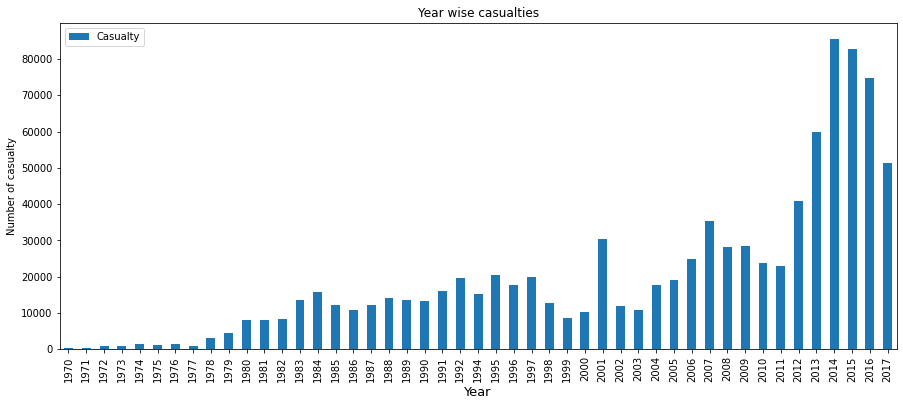

In [15]:
yc.plot(kind="bar",figsize=(15,6))
plt.title("Year wise casualties")
plt.xlabel("Year",fontsize=13)
plt.ylabel("Number of casualty")

**INFERENCE**: Year 2014 have highest casualties

**2. Killed in each year**

In [16]:
yk=df[["Year","Killed"]].groupby("Year").sum()

Text(0, 0.5, 'Number of people killed')

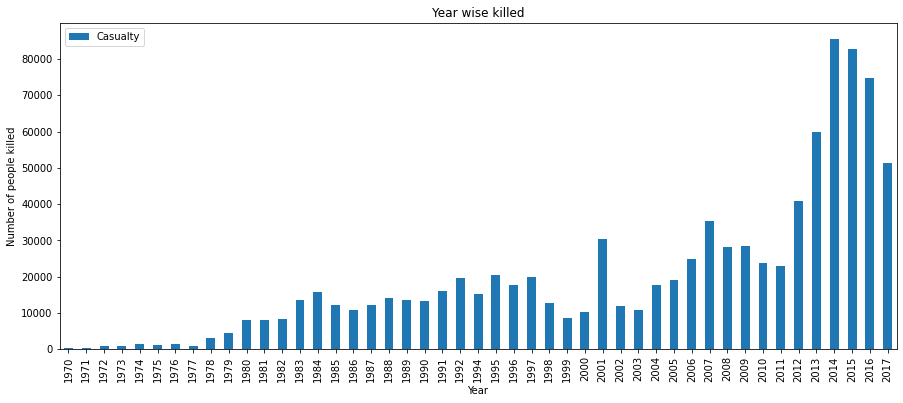

In [17]:
yc.plot(kind="bar",figsize=(15,6))
plt.title("Year wise killed")
plt.xlabel("Year")
plt.ylabel("Number of people killed")

**INFERENCE**: Maximum number of people killed in year 2014

**3. Region wise attack**

In [18]:
reg=pd.crosstab(df.Year,df.Region)

In [19]:
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


Text(0, 0.5, 'Number of attacks')

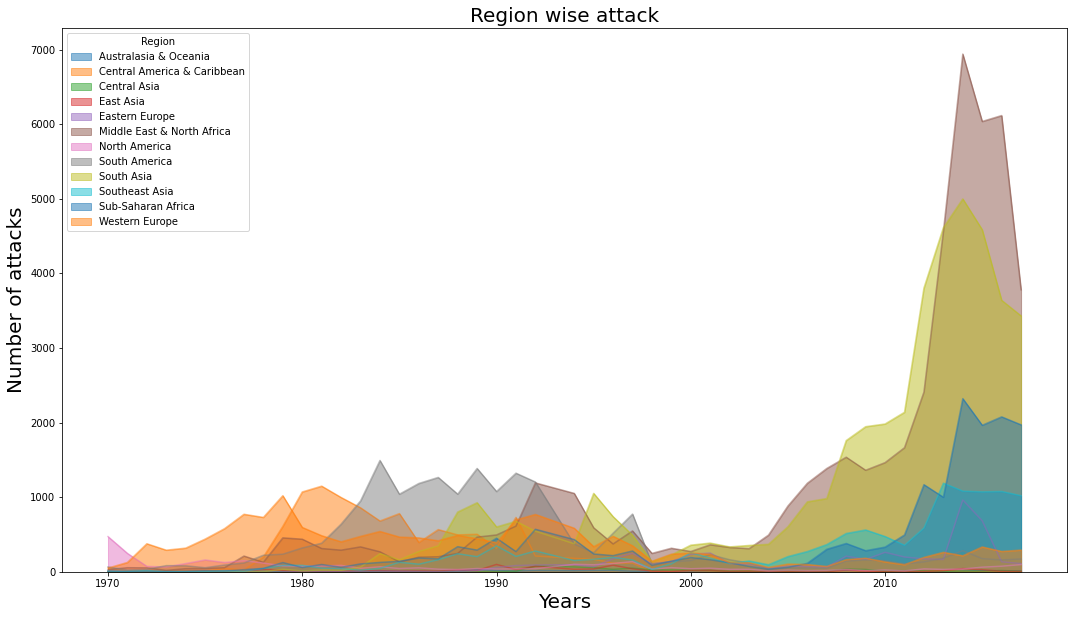

In [20]:
reg.plot(kind="area",stacked=False,alpha=0.5, figsize=(18,10))
plt.title("Region wise attack", fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)

**INFERENCE**:As we can see most affected region is Middle East

In [21]:
reg.max()

Region
Australasia & Oceania            29
Central America & Caribbean    1148
Central Asia                     77
East Asia                        99
Eastern Europe                  962
Middle East & North Africa     6939
North America                   472
South America                  1492
South Asia                     4998
Southeast Asia                 1188
Sub-Saharan Africa             2321
Western Europe                 1020
dtype: int64

**4. Country wise attack**

In [22]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

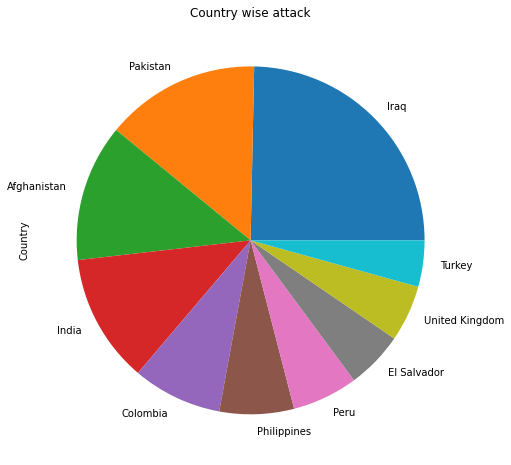

In [23]:
ct.plot(kind="pie",figsize=(12,8))
plt.title("Country wise attack")
plt.show()

**INFERENCE**: Iraq is most affected country

**5.Group wise attack**

In [24]:
grp=df['Group Name'].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

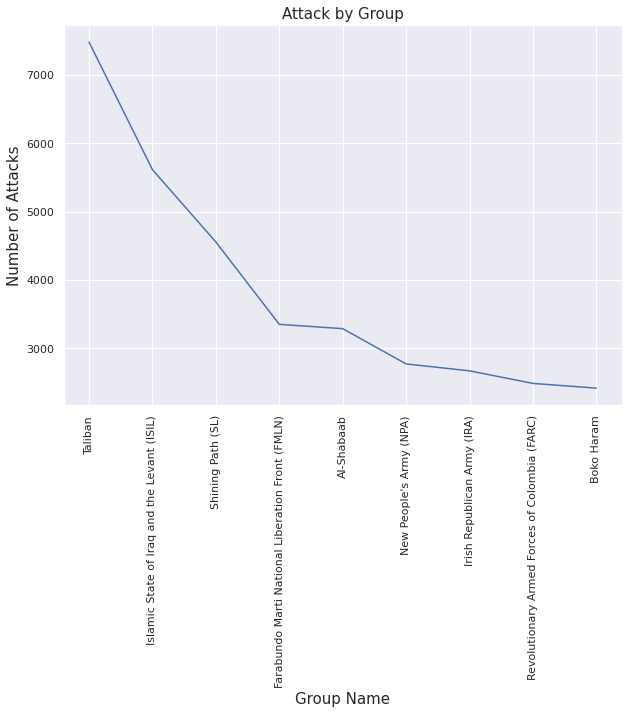

In [28]:
grp.plot(kind="line",figsize=(10,7))
plt.title("Attack by Group",fontsize=15)
plt.xlabel("Group Name",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.xticks(rotation=90)
plt.show()


**INFERENCE**: As we can see amongs all group Taliban casued most damage

**6. Weapon Used**

Text(0.5, 1.0, 'Different weapon used')

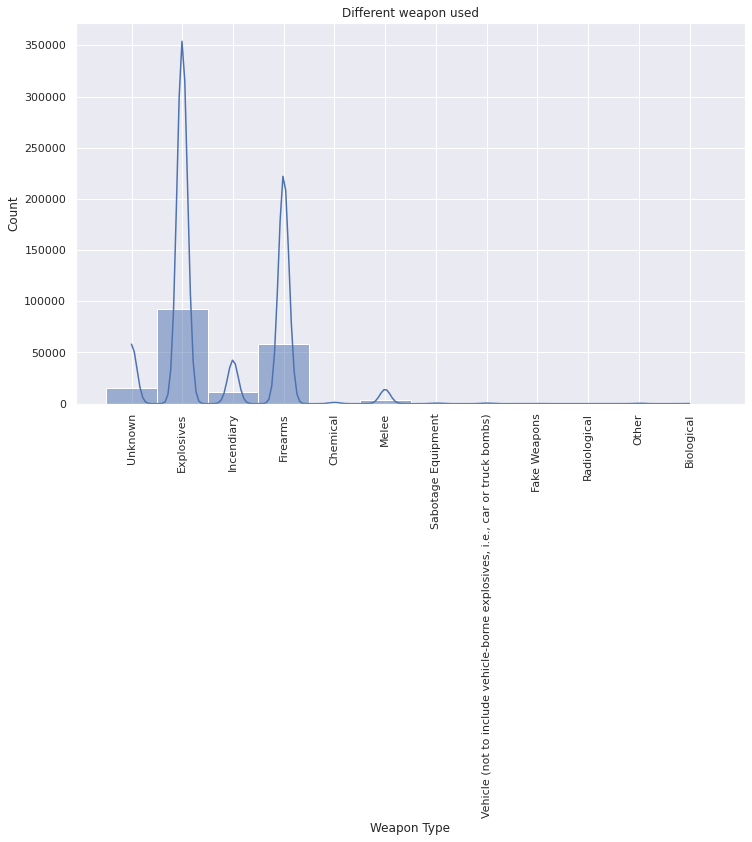

In [27]:
sns.histplot(df["Weapon Type"],kde=True)
sns.set(rc={"figure.figsize":(12,7)})
plt.xticks(rotation=90)
plt.title("Different weapon used")

**INFERENCE:** Most number of times used weapon is Explosives

**Conclusion**

Year 2014 have highest casualty,also most number of people killed in same year.

While Year 1970 have lowest casualty.

After analysing above data i can say that terrorism activity increases over time.

Talking about region Middle east was most affected region followed by North Africa.

Iraq suffered most followed by Pakistan.

Taliban was responsible for most number of attacks followed by Islamic States of Iraq and Levant(ISIL).

Explosives was used maximum time for attack

